In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5]


# Tiempo computo en el metodo de la potencia

Queremos ver como se compara el tiempo teorico de $O(kn^2)$ del metodo de la potencia con el empirico ($k$ la cantidad de iteraciones prefijadas y $n$ la dimension de las filas y columnas de la matriz). Como hay dos constantes independientes en la complejidad, primero fijamos la cantidad de iteraciones y variamos la dimension de la matriz; luego repetimos con dimension fija e iteraciones variantes.

In [2]:
# Lectura datos
path = './datosComportamiento/potencia'
caso_dimension = pd.read_csv(f'{path}/TiempoTamanio100Tam.csv', header=None)
caso_iteraciones = pd.read_csv(f'{path}/TiempoTamanio100Iter.csv', header=None)

def graficar_tiempo(data, pendiente_recta=1):
    variable = list(data.iloc[:, 0])
    tiempo = [np.median(list(data.iloc[i, :])[1:]) for i in range(len(variable))]

    x = np.linspace(min(variable[1:]), max(variable[1:]))
    
    plt.plot(x, x ** pendiente_recta, label=f'Curva n^{pendiente_recta}')
    plt.plot(variable[1:], tiempo[1:], marker='o', label='Mediana tiempo computo')
    
    plt.grid()
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')


### En funcion de la dimension

Corremos el metodo de la potencia 100 iteraciones para 100 condiciones iniciales. Graficamos la mediana del tiempo de computo en funcion de la dimension de la matriz en escala logaritmica. Tambien superponemos una recta de pendiente 2 en el mismo grafico para ver si resulta paralela al grafico anterior, ya que esto implicaria que el tiempo va como $O(n^2)$. 

Corremos el algoritmo para una dimension de columnas de 50, 500, 2000 y 5000.

Text(0, 0.5, 'Tiempo computo [s]')

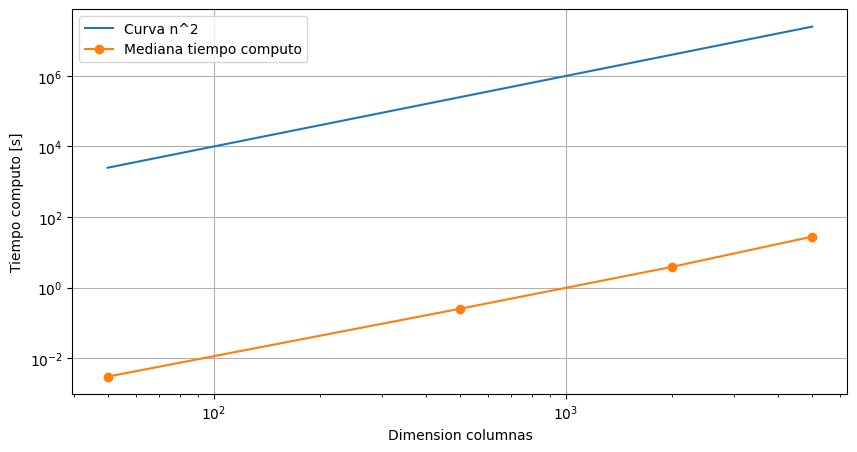

In [3]:
graficar_tiempo(caso_dimension, 2)
plt.xlabel('Dimension columnas')
plt.ylabel('Tiempo computo [s]')

Consistente con que el algoritmo tiene una complejidad $O(n^2)$ observamos que el tiempo de computo en escala logaritmica es una recta paralela a otra de pendiente 2. Vemos ahora que ocurre variando la cantidad de iteraciones y dejando fija la dimension.

### Dimension fija, iteraciones variantes

Corremos el metodo de la potencia para una matriz de dimension 100x100 para 100 condiciones iniciales. Graficamos la mediana del tiempo de computo en funcion de la cantidad de iteraciones del metodo en escala logaritmica. Tambien superponemos una recta de pendiente 1 en el mismo grafico para ver si resulta paralela al grafico anterior, ya que esto implicaria que el tiempo va como $O(k)$. 

Corremos el algoritmo para una cantidad de iteraciones de 50, 500, 2000 y 5000.

Text(0, 0.5, 'Tiempo computo [s]')

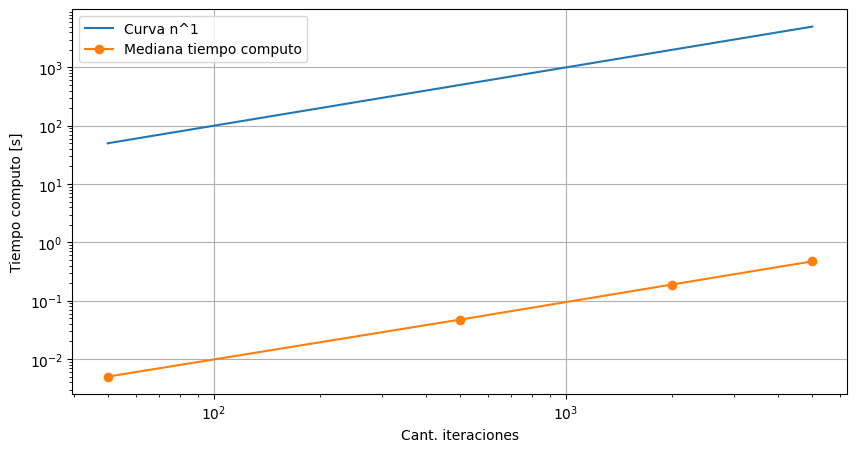

In [4]:
graficar_tiempo(caso_iteraciones, 1)
plt.xlabel('Cant. iteraciones')
plt.ylabel('Tiempo computo [s]')

Como esperabamos, el tiempo de computo en funcion de la cantidad de iteraciones en escala logaritmica es una recta paralela a otra de pendiente 1. Esto indica que efectivamente el tiempo de computo va como $O(k)$.

#### Conclusiones

En base al experimento previo podemos concluir que el tiempo de computo del algoritmo va como $O(k n^2)$. De cualquier forma, para una matriz arbitraria no conocemos la cantidad de iteraciones necesarias para obtener un autovalor dominante suficientemente cercano al real. Esto motiva la siguiente seccion, en la cual estudiamos el error en funcion de la cantidad de iteraciones para ver si hay una iteracion optima, o si varia mucho dependiendo la matriz.

# Error en funcion de la cantidad de iteraciones

Queremos ver para matrices diagonalizables el error del metodo de la potencia luego de correr un numero finito de iteraciones. Para esto elegimos 4 matrices representativas de casos de orden de autovalores distintos:

1) El autovalor dominante es considerablemente mayor al resto

2) Todos los autovalores son iguales, con excepcion del dominante que es marginalmente mayor

3) El dominante y el siguiente mayor son muy similares, pero el resto es distinto

Como en cada corrida del algoritmo se toma una condicion inicial arbitraria con Eigen, el grafico de error vs iteraciones va a naturalmente variar. Para ver su comportamiento general tomamos 100 mediciones en cada caso, cada una correspondiente a una cond. inicial distinta y graficamos los boxplots.

In [5]:
# Lectura datos
path = './datosComportamiento/potencia'
caso_1 = pd.read_csv(f'{path}/DominanteMuyDistintoIteraciones.csv', header=None)
caso_2 = pd.read_csv(f'{path}/TodosParecidosIteraciones.csv', header=None)
caso_3 = pd.read_csv(f'{path}/DosParecidosIteraciones.csv', header=None)
caso_4 = pd.read_csv(f'{path}/NoConvergeIteraciones.csv', header=None)

def graficar_boxplots(data, x_max, step=1):
    iteraciones = list(data.iloc[:, 0])
    errores = [list(data.iloc[i, :])[1:] for i in range(len(iteraciones))]

    plt.xlim([0, x_max])
    plt.grid()
    plt.boxplot(errores[::step], positions=iteraciones[::step], widths=step/2)

### Autovalor dominante muy distinto al resto

La matriz $M$ es de 10x10 y consiste en la identidad con la modificacion $M_{11} = 5$

Text(0, 0.5, 'Error al finalizar el algoritmo')

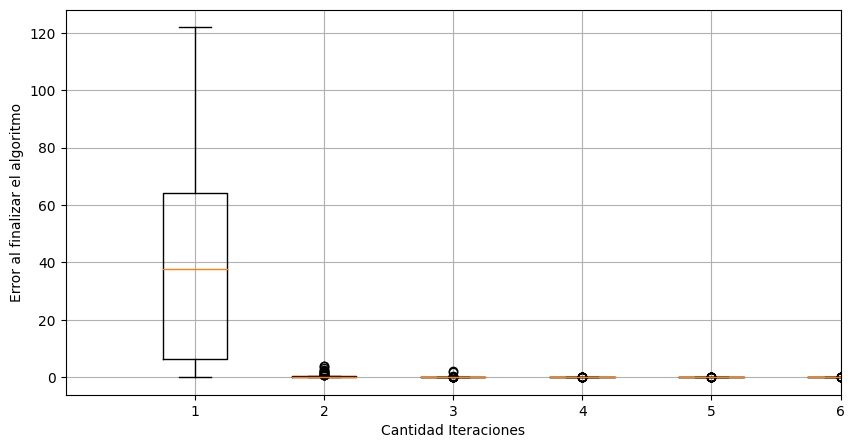

In [6]:
graficar_boxplots(caso_1, 6)
plt.xlabel("Cantidad Iteraciones")
plt.ylabel("Error al finalizar el algoritmo")

Observamos como hay muchisima varianza en el error respecto a la primer iteracion, pero que luego de 4 iteraciones la sucesion ya practicamente converge para todas las sucesiones. En todos los casos luego de la 7ma iteracion la sucesion tiene un error de 0 respecto al autovalor real de 5.

### Todos autovalores similares al dominante

La matriz $M$ es de 10x10 y consiste en la identidad con la modificacion $M_{11} = 1.01$

(0.0, 0.012)

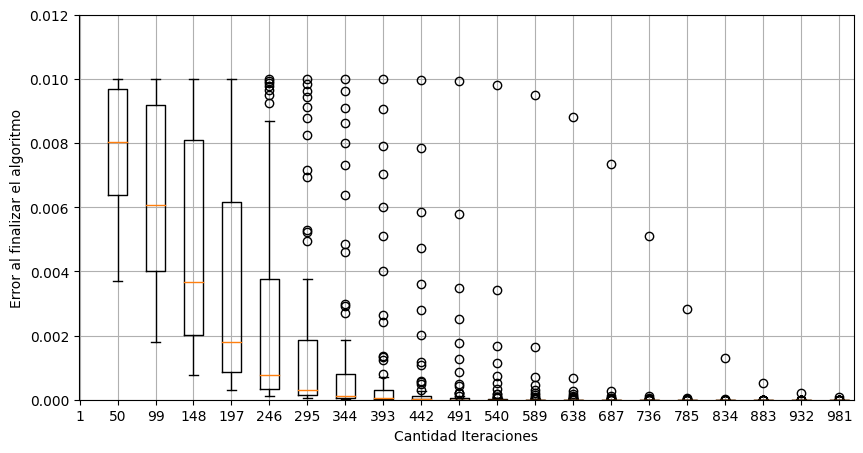

In [7]:
graficar_boxplots(caso_2, 1000, 49)
plt.xlabel("Cantidad Iteraciones")
plt.ylabel("Error al finalizar el algoritmo")

plt.ylim(0, 0.012)

Observamos que al igual que en el caso ideal (un autovalor dominante mucho mayor al resto) la varianza inicial de error es muy elevada. Esta varianza se mantiene por cientos de iteraciones, y peor aun se observan muchos outliers hasta alrededor de la iteracion 700. Esto es indicativo que no es buena practica fijar la cantidad de iteraciones antes de correr el algoritmo, ya que la convergencia respecto a un epsilon chico se puede dar en la iteracion 400, 800 o posiblemente muchisimo mas.

Tambien vemos como la mediana de valores marca una muy clara tendencia a constantemente decrecer luego de la iteracion 50.

Es interesante notar que a pesar de haber generado 100 condiciones iniciales, ninguna fue tan mala (ortogonal respecto al autovector dominante) como para que el algoritmo no converja. De cualquier forma si vimos muchisimas varianza en el error para toda iteracion. Consideramos que para matrices considerablemente mayores a 10x10 -como las que vamos a trabajar- la probabilidad de encontrar un vector aproximadamente "ortogonal" (el prod interno respecto al autovector dominante es cercano a 0) es tan chica que no tiene sentido preocuparse.


### Solo un autovalor similar al dominante, el resto distinto

La matriz $M$ es de 10x10 y consiste en la identidad con la modificacion $M_{11} = 2.01$ y $M_{22} = 2$

Text(0, 0.5, 'Error al finalizar el algoritmo')

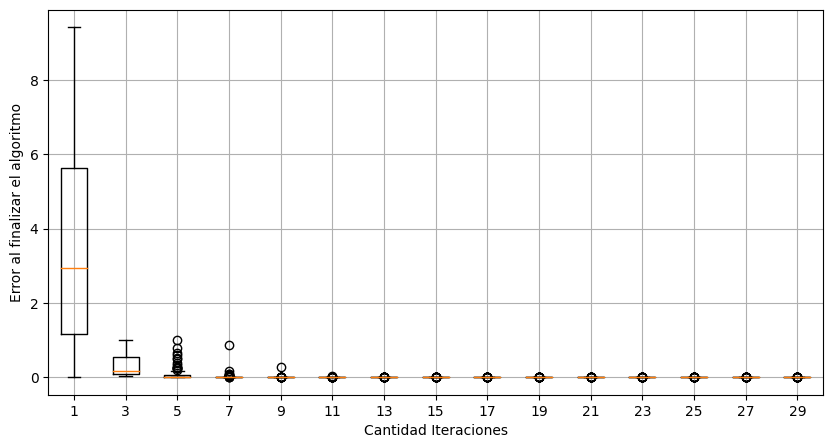

In [8]:
graficar_boxplots(caso_3, 30, 2)
plt.xlabel("Cantidad Iteraciones")
plt.ylabel("Error al finalizar el algoritmo")

Como en los casos anteriores, encontramos mucha varianza inicial en el error. Para todas las condiciones iniciales esta decae a un valor despreciablemente distinto del 0 en menos de 13 iteraciones, a diferencia del caso anterior donde tomaba mas de 700 y existian muchos outliers.

Toda esta evidencia es indicativa que la cantidad de iteraciones para que se de la convergencia del algoritmo aumenta con la cantidad de autovalores similares al dominante.

#### Conclusiones

La cantidad de iteraciones que requiere el algoritmo depende fuertemente de la matriz original. A medida aumenta la cantidad de autovalores similares al dominante, el algoritmo requiere cada vez mas iteraciones para que el error sea suficientemente cercano a 0 dada una condicion inicial. No solo eso pero la varianza del error para una condicion inicial arbitraria tambien crece considerablemente con la similitud.

Para solucionar esto implementamos el metodo de la potencia de forma que toma un threshold $\epsilon$ y una cantidad de valores de tolerancia $m$. Este itera la sucesion hasta que por lo menos $m$ valores consecutivos estan a distancia menor a $\epsilon$. Si no llega a $m$ valores luego de $n^3$ iteraciones, lo intenta hasta 4 veces mas. Esto independiza al algoritmo de una cantidad de iteraciones fijas y asi se desprecia el efecto de la varianza del error.

# Error en el calculo de autovectores para matrices simetricas arbitrarias con el nuevo metodo

Queremos comparar el comportamiento del algoritmo para calcular autovectores y valores con un algoritmo mas sofisticado como es el de Eigen. Generamos 200 matrices simetricas de 100x100 con cada coordenada sampleada de una uniforme U([-1, 1]) y tomamos como "error" a la norma 2 de la diferencia de autovalores ordenados de mayor a menor. Usamos un threshold de $10^{-6}$ y una cantidad de valores de tolerancia de 30. Lo graficamos en un histograma:

Text(0, 0.5, 'Ocurrencias')

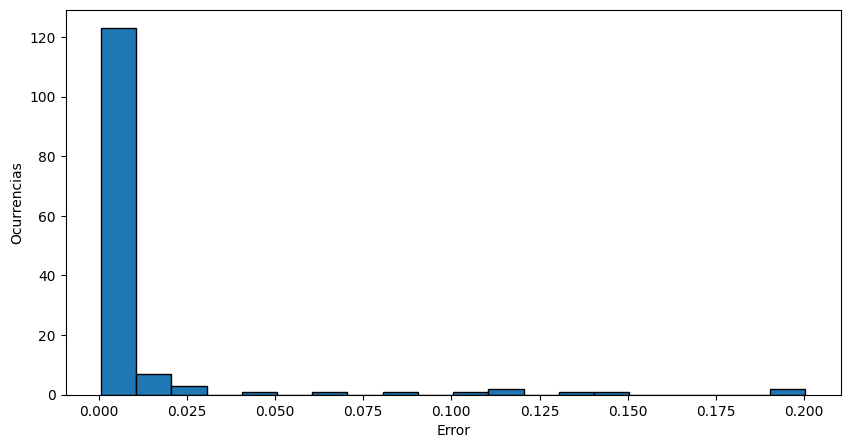

In [9]:
# Lectura datos
path = './datosComportamiento/autovectores'
archivo_tiempo = pd.read_csv(f'{path}/errorAutovectores1.csv', header=None)

error = list(archivo_tiempo.iloc[0, :])

plt.hist(error, bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Ocurrencias')

Vemos como para las 200 matrices, la mayor parte de la diferencia entre autovalores esta por debajo de 0.03. Se observan unos cuantos outliers con un error que llega hasta un orden de magnitud mayor. Estudiando los autovalores de la matriz simetrica generada con Eigen nos encontramos como para todos estos casos (error mayor a 0.03) hay autovalores que en valor absoluto difieren recien en el tercer o cuarto decimal! Como vimos originalmente estas matrices requieren un numero muy elevado de iteraciones para converger siempre, por lo que tiene sentido que a pesar de correr el algoritmo hasta 5 veces 10000 iteraciones, no llega a un resultado tan preciso como el resto.

De cualquier forma vemos que el comportamiento es muy similar al de Eigen, y que incluso en las matrices poco optimas, el metodo da resultados con un error muy bajo. Consideramos que el algoritmo es fiable para obtener una muy buena aproximacion de autovalores y vectores.